## HW2

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# housing dataset:
train_house = np.loadtxt("housing_data/train.txt")
test_house = np.loadtxt("housing_data/test.txt")

# spambase dataset:
spambase_data = np.loadtxt("spambase/spambase.data", delimiter=",")

Q1 A - Housing dataset with Linear Reg (normal eqns)

In [84]:
# 1. separate features and labels
X_train = train_house[:, :-1]
y_train = train_house[:, -1]
X_test = test_house[:, :-1]
y_test = test_house[:, -1]

# 2. Normalization step
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# 3. bias step
ones_col_Xtrain = np.ones((X_train_normalized.shape[0], 1))
ones_col_Xtest = np.ones((X_test_normalized.shape[0], 1))

Xtrain_house_bias = np.hstack([ones_col_Xtrain, X_train_normalized])
Xtest_house_bias = np.hstack([ones_col_Xtest, X_test_normalized])

# 4. Normal Eqn step
Xtrain_T = Xtrain_house_bias.T
Xtrain_dot = np.dot(Xtrain_T, Xtrain_house_bias)
Xtrain_inv = np.linalg.inv(Xtrain_dot)
Xtrain_y_dot = np.dot(Xtrain_T, y_train)
theta_1 = np.dot(Xtrain_inv, Xtrain_y_dot)

# 5. Prediction step
train_house_pred = np.dot(Xtrain_house_bias, theta_1)
test_house_pred = np.dot(Xtest_house_bias, theta_1)

# 6. MSE for linear reg with normal equations
train_mse_1 = np.mean((train_house_pred-y_train)**2)
test_mse_1 = np.mean((test_house_pred-y_test)**2)

print(f"TRAIN-MSE-1 Housing data with Linear Reg: {train_mse_1}")
print(f"TEST-MSE-1 Housing data with Linear Reg: {test_mse_1}")

TRAIN-MSE-1 Housing data with Linear Reg: 22.081273187013167
TEST-MSE-1 Housing data with Linear Reg: 22.638256296587716


Q1 B - Housing dataset with Linear Ridge Reg ->
$ \theta = (X^TX + \lambda I) X^T Y $

In [85]:
lambdas = np.arange(0, 2.1, 0.1)
test_mses = []
train_mses = []
# using normalized and bias data from Q1 A part

for lambda_ridge in lambdas:
    I = np.eye(Xtrain_house_bias.shape[1])
    I[0,0] = 0

    # ridge regression by normal equation
    Xtrain_T = Xtrain_house_bias.T
    Xtrain_dot_ridge = np.dot(Xtrain_T, Xtrain_house_bias) + lambda_ridge*I
    Xtrain_inv_ridge = np.linalg.inv(Xtrain_dot_ridge)
    Xtrain_y_dot = np.dot(Xtrain_T, y_train)
    theta_2 = np.dot(Xtrain_inv_ridge, Xtrain_y_dot)

    # predictions step
    train_house_pred_ridge = np.dot(Xtrain_house_bias, theta_2)
    test_house_pred_ridge = np.dot(Xtest_house_bias, theta_2)

    # MSE for housing data with linear ridge regression
    train_mse_2 = np.mean((train_house_pred_ridge-y_train)**2)
    test_mse_2 = np.mean((test_house_pred_ridge-y_test)**2)

    train_mses.append(train_mse_2)
    test_mses.append(test_mse_2)

    print(f"Lambda: {lambda_ridge:.1f} | Train MSE-2: {train_mse_2:.4f} | Test MSE-2: {test_mse_2:.4f}")

# best lambda based on test MSE
best_idx = np.argmin(test_mses)
best_lambda = lambdas[best_idx]
best_train_mse = train_mses[best_idx]
best_test_mse = test_mses[best_idx]

print("\n" + "="*60)
print(f"BEST Lambda: {best_lambda:.1f}")
print(f"Best Train MSE: {best_train_mse:.6f}")
print(f"Best Test MSE: {best_test_mse:.6f}")

Lambda: 0.0 | Train MSE-2: 22.0813 | Test MSE-2: 22.6383
Lambda: 0.1 | Train MSE-2: 22.0813 | Test MSE-2: 22.6181
Lambda: 0.2 | Train MSE-2: 22.0814 | Test MSE-2: 22.5981
Lambda: 0.3 | Train MSE-2: 22.0815 | Test MSE-2: 22.5783
Lambda: 0.4 | Train MSE-2: 22.0816 | Test MSE-2: 22.5587
Lambda: 0.5 | Train MSE-2: 22.0818 | Test MSE-2: 22.5393
Lambda: 0.6 | Train MSE-2: 22.0821 | Test MSE-2: 22.5200
Lambda: 0.7 | Train MSE-2: 22.0823 | Test MSE-2: 22.5009
Lambda: 0.8 | Train MSE-2: 22.0827 | Test MSE-2: 22.4820
Lambda: 0.9 | Train MSE-2: 22.0830 | Test MSE-2: 22.4632
Lambda: 1.0 | Train MSE-2: 22.0834 | Test MSE-2: 22.4446
Lambda: 1.1 | Train MSE-2: 22.0838 | Test MSE-2: 22.4261
Lambda: 1.2 | Train MSE-2: 22.0843 | Test MSE-2: 22.4078
Lambda: 1.3 | Train MSE-2: 22.0848 | Test MSE-2: 22.3896
Lambda: 1.4 | Train MSE-2: 22.0853 | Test MSE-2: 22.3716
Lambda: 1.5 | Train MSE-2: 22.0859 | Test MSE-2: 22.3537
Lambda: 1.6 | Train MSE-2: 22.0865 | Test MSE-2: 22.3360
Lambda: 1.7 | Train MSE-2: 22.0

Q1 C - Housing dataset with Linear Reg (Gradient Descent)

In [86]:
def gradient_descent_lin_reg(X, y, lr=0.1, epochs=1000):
    n,d = X.shape
    w = np.zeros(d)

    loss_history = []

    for epoch in range(epochs):
        predictions = X @ w
        error = predictions - y

        gradient = (1/n) * X.T @ error

        w = w-lr*gradient

        loss = np.mean(error**2)
        loss_history.append(loss)

        if epoch%100==0:
            print(f"Epoch {epoch}, MSE: {loss:.4f}")

    return w, loss_history

Train Linear Regression with Gradient Descent:
Epoch 0, MSE: 612.9033
Epoch 100, MSE: 22.4535
Epoch 200, MSE: 22.1887
Epoch 300, MSE: 22.1192
Epoch 400, MSE: 22.0951
Epoch 500, MSE: 22.0863
Epoch 600, MSE: 22.0831
Epoch 700, MSE: 22.0819
Epoch 800, MSE: 22.0815
Epoch 900, MSE: 22.0814

 Final Train MSE: 22.081306

 Final Test MSE: 22.623622


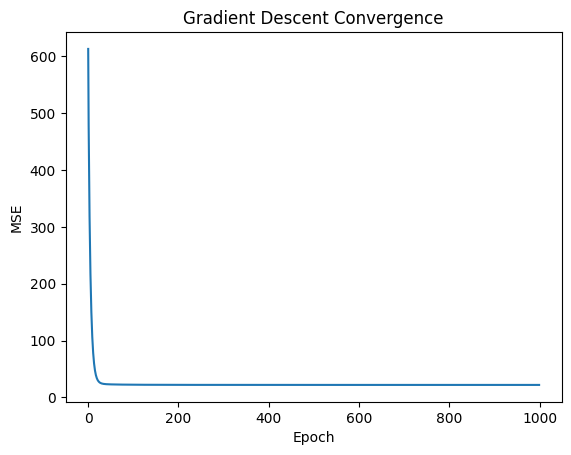

In [87]:
print("Train Linear Regression with Gradient Descent:")
w_gd, losses = gradient_descent_lin_reg(Xtrain_house_bias, y_train, lr=0.1, epochs=1000)

# predictions step:
train_pred_gd = Xtrain_house_bias @ w_gd
test_pred_gd = Xtest_house_bias @ w_gd

# MSE Calculation:
train_mse_3 = np.mean((train_pred_gd-y_train) ** 2)
test_mse_3 = np.mean((test_pred_gd-y_test) ** 2)

print(f"\n Final Train MSE: {train_mse_3:.6f}")
print(f"\n Final Test MSE: {test_mse_3:.6f}")

# Convergence Plot:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Gradient Descent Convergence')
plt.show()

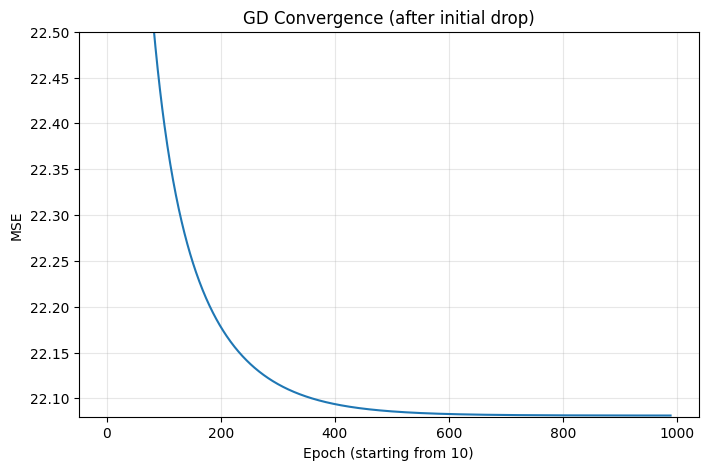

In [88]:
plt.figure(figsize=(8, 5))
plt.plot(losses[10:])
plt.xlabel('Epoch (starting from 10)')
plt.ylabel('MSE')
plt.title('GD Convergence (after initial drop)')
plt.ylim(22.08, 22.5)
plt.grid(True, alpha=0.3)
plt.show()

Q1 D - Housing dataset with Logistic Reg (Gradient Descent) this won't work as for housing problem we need to predict continuous values ( house prices like 250k ,321k etc). But logistic regression gives us probabilities between 0 and 1 via the sigmoid function. It helps us predict discrete classes (spam/ not spam, pass/fail) not continuous values and is inappropriate for unbounded continuous values like house prices.

Q1 E - Spambase dataset with Linear Regression (Normal Equations)

In [89]:
X = spambase_data[:, :-1]
y = spambase_data[:, -1]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalization step:
scalar_spam = StandardScaler()
scalar_spam.fit(X_train)
X_train_normalized = scalar_spam.transform(X_train)
X_test_normalized = scalar_spam.transform(X_test)

# add bias term:
ones_col_Xtrain = np.ones((X_train_normalized.shape[0], 1))
ones_col_Xtest = np.ones((X_test_normalized.shape[0], 1))
spam_Xtrain_bias = np.hstack([ones_col_Xtrain, X_train_normalized])
spam_Xtest_bias = np.hstack([ones_col_Xtest, X_test_normalized])

# Normal Equation step:
spamXtrain_T = spam_Xtrain_bias.T
spamXtrain_dot = spamXtrain_T @ spam_Xtrain_bias
spamXtrain_inverse = np.linalg.inv(spamXtrain_dot)
spamX_y_dot = spamXtrain_T @ y_train
w_spam_linear = spamXtrain_inverse @ spamX_y_dot

# predictions:
train_continuous_pred = spam_Xtrain_bias @ w_spam_linear
test_continuous_pred = spam_Xtest_bias @ w_spam_linear

In [90]:
# Binary classification with threshold:
threshold = 0.42
train_binary_pred = (train_continuous_pred>threshold).astype(int)
test_binary_pred = (test_continuous_pred>threshold).astype(int)

# Accuracy:
train_acc_linear = np.mean(train_binary_pred == y_train)
test_acc_linear = np.mean(test_binary_pred == y_test)

print(f"\nLinear Regression on Spambase:")
print(f"Train Accuracy: {train_acc_linear:.4f}")
print(f"Test Accuracy: {test_acc_linear:.4f}")


Linear Regression on Spambase:
Train Accuracy: 0.9111
Test Accuracy: 0.9110


In [91]:
# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

cm_linear = confusion_matrix(y_test, test_binary_pred)
print(f"\nConfusion Matrix (Linear Regression):")
print(f"[[TN={cm_linear[0,0]} FP={cm_linear[0,1]}]")
print(f" [FN={cm_linear[1,0]} TP={cm_linear[1,1]}]]")


Confusion Matrix (Linear Regression):
[[TN=492 FP=39]
 [FN=43 TP=347]]


Q1 F - Spambase dataset with Linear Ridge Regression

In [92]:
# Using the above normalized and biased data as in Q1 E

# RIDGE REGRESSION with Regularization:
lambda_ridge = 0.1
threshold = 0.42

I = np.eye(spam_Xtrain_bias.shape[1])
I[0,0] = 0

# normal equation step:
spamXtrain_T = spam_Xtrain_bias.T
spamXtrain_dot_ridge = spamXtrain_T @ spam_Xtrain_bias + lambda_ridge * I
spamXtrain_inverse_ridge = np.linalg.inv(spamXtrain_dot_ridge)
spamX_y_dot = spamXtrain_T @ y_train
w_spam_ridge = spamXtrain_inverse_ridge @ spamX_y_dot

# prediction calculations:
train_conti_ridge = spam_Xtrain_bias @ w_spam_ridge
test_conti_ridge = spam_Xtest_bias @ w_spam_ridge

# binary classification:
train_binary_ridge = (train_conti_ridge > threshold).astype(int)
test_binary_ridge = (test_conti_ridge > threshold).astype(int)

# accuracy:
train_acc_ridge = np.mean(train_binary_ridge==y_train)
test_acc_ridge = np.mean(test_binary_ridge==y_test)

print(f"\nLinear Ridge Regression on Spambase (λ={lambda_ridge}):")
print(f"Train Accuracy: {train_acc_ridge:.4f}")
print(f"Test Accuracy: {test_acc_ridge:.4f}")


Linear Ridge Regression on Spambase (λ=0.1):
Train Accuracy: 0.9111
Test Accuracy: 0.9110


In [93]:
# Optional: Test different lambda values
print("\nTesting different lambda values:")
lambdas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
for lam in lambdas:
    I = np.eye(spam_Xtrain_bias.shape[1])
    I[0, 0] = 0

    Xtrain_dot_ridge = np.dot(spamXtrain_T, spam_Xtrain_bias) + lam * I
    Xtrain_inv_ridge = np.linalg.inv(Xtrain_dot_ridge)
    w_ridge = np.dot(Xtrain_inv_ridge, spamX_y_dot)

    test_pred = np.dot(spam_Xtest_bias, w_ridge)
    test_binary = (test_pred > threshold).astype(int)
    test_acc = np.mean(test_binary == y_test)

    print(f"λ={lam:5.2f}: Test Accuracy = {test_acc:.4f}")


Testing different lambda values:
λ= 0.01: Test Accuracy = 0.9110
λ= 0.10: Test Accuracy = 0.9110
λ= 0.50: Test Accuracy = 0.9110
λ= 1.00: Test Accuracy = 0.9110
λ= 5.00: Test Accuracy = 0.9110
λ=10.00: Test Accuracy = 0.9121


Q1 G - Spambase dataset with Linear Regression using Gradient Descent

Q1 H - Spambase dataset with Logistic Regression using Gradient descent